# Tutorial sobre la Técnica de Clasificación kNN

## 1. Fundamentos de la técnica

**k-Nearest Neighbors (kNN)** es un algoritmo de aprendizaje automático supervisado que se puede utilizar tanto para **clasificación** como **regresión**.
La principal diferencia entre estos dos enfoques es que la clasificación se emplea para valores discretos, mientras que la regresión se usa con valores continuos.

Además, cabe mencionar que kNN es de **"aprendizaje perezoso"**, es decir, que solo almacena un conjunto de datos de entrenamiento, no se somete a una fase de entrenamiento, como sí lo hacía el perceptrón, por ejemplo.

El proceso de predicción que sigue la técnica es el siguiente:
1.  Se le presenta un nuevo punto de dato ($x_{\text{nuevo}}$) para clasificar.
2.  Calcula la **distancia** desde $x_{\text{nuevo}}$ a todos los puntos en el conjunto de entrenamiento.
3.  Identifica los **'k'** puntos de entrenamiento más cercanos o sus "vecinos", cuyo valor es arbitrario.
4.  **Para clasificación:** Realiza una "votación de mayoría", es decir, la clase que más se repite entre los 'k' vecinos es la predicción para $x_{\text{nuevo}}$.
5.  **Para regresión:** Promedia los valores de los 'k' vecinos.

La clave del modelo es la elección de **'k'** (un número entero, usualmente impar para evitar posibles empates) y la **métrica de distancia**.

## 2. Modelo matemático

La matemática principal reside en la **métrica de distancia**. Existen varias métricas como la Distancia de Manhattan o la Distancia de Minkowski, pero definitivamente la más común, y que nos interesa para este tutorial, es la **Distancia Euclidiana**.

Para dos puntos $p$ y $q$ en un espacio de $n$ dimensiones (es decir, con $n$ características):
$p = (p_1, p_2, ..., p_n)$
$q = (q_1, q_2, ..., q_n)$

La distancia se calcula como:

$$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + ... + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$

Dado que kNN se basa enteramente en distancias, es **muy sensible a la escala de las características**. Si una característica (ej. salario, en cientos de miles) es mucho más grande que otra (ej. edad, en decenas), la característica con mayor magnitud dominará el cálculo de la distancia. Por eso, el escalado de características (Estandarización) es un paso de preprocesamiento casi obligatorio.

## 3. Descripción de las librerías, clases y funciones

Para el análisis estadístico se hará uso de Pandas, Matplotlib para la visualización y Scikit-learn para el modelo, métricas y preprocesamiento de los datos, los cuales serán obtenidos del tan popular dataset "Iris".

Las herramientas empleadas serán descritas más adelante, por lo que de momento seguimos con las importaciones necesarias como se muestra a continuación:

In [1]:
# Importaciones generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funciones de Scikit-learn para la generación de datos y preprocesamiento
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas para evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, confusion_matrix

# Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

Ahora sí continuamos una descripción más detallada para cada herramienta a utilizar:

* `pandas`: Es una librería que se usará para cargar los datos en un `DataFrame`, lo que facilita enormemente el cálculo de estadísticas descriptivas con el método `.describe()`.
* `load_iris`: Se trata de un conjunto de datos clásico incluido en `sklearn`. Contiene 150 muestras de 3 especies diferentes de flores (Setosa, Versicolor, Virginica) con 4 características cada una.
* `StandardScaler`: Se encarga de estandarizar las características para que todas tengan una media de 0 y una desviación estándar de 1, evitando que una característica domine la métrica de distancia.
* `KNeighborsClassifier`: Esta es la clase de `sklearn` que implementa el algoritmo kNN para clasificación. Su hiperparámetro clave es `n_neighbors` (el valor 'k').
* `accuracy_score`: Métrica de rendimiento que calcula el porcentaje de predicciones correctas.
* `confusion_matrix`: Métrica de rendimiento que muestra cuántas veces se confundió una clase con otra.

## 4. Pipeline

### Preprocesamiento

--- Análisis Estadístico Descriptivo de las Características ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  




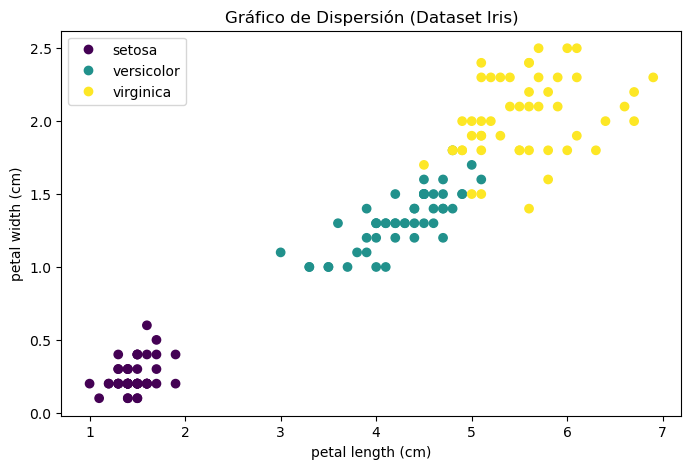

Datos de entrenamiento escalados (shape): (105, 4)
Datos de prueba escalados (shape): (45, 4)


In [5]:
# Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# Análisis Estadístico
# Convertir X a un DataFrame de Pandas para usar .describe()
df = pd.DataFrame(X, columns=iris.feature_names)
print("--- Análisis Estadístico Descriptivo de las Características ---")
print(df.describe())
print("\n")

# Gráfico de Dispersión
# Graficaremos solo dos características (petal length vs petal width) ya que son muy buenas para separar las clases.
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis')
plt.title("Gráfico de Dispersión (Dataset Iris)")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.show()

# División de datos para entrenar y probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Datos de entrenamiento escalados (shape): {X_train_scaled.shape}")
print(f"Datos de prueba escalados (shape): {X_test_scaled.shape}")

### Feature Engineering

Como se demostró en el punto anterior, en la selección de características se prefirieron los atributos petal length y petal width para graficar, ya que son las que se conoce de antemano que son mejores para separar las clases; sepal length y sepal width arrojarían gráficas más superpuestas y sería más complicado para nosotros entender. Sin embargo, para predecir una nueva flor sí se utilizarán las 4 características, pues el modelo sí es capaz de procesar los datos para ser más preciso.

Además, se aplicó el escalado para que, como ya se mencionaba anteriormente, una variable no domine sobre otra.

### Prediction

Antes de comenzar a clasificar los datos, es necesario crear y "entrenar", por más que sea un algoritmo perezoso, el modelo, lo cual consiste en almacenar los datos de `X_train_scaled` y `y_train` dentro del objeto del modelo.

Eso sin mencionar que hay que elegir de manera arbitraria, y preferiblemente que sea impar, un número 'k' que en este caso es igual a 5.

In [6]:
# Definir el valor de k
k = 5

# Crear la instancia del modelo
knn_model = KNeighborsClassifier(n_neighbors=k)

# "Entrenar" el modelo (almacenando los datos)
knn_model.fit(X_train_scaled, y_train)

print(f"Modelo kNN (k={k}) 'entrenado' y listo para predecir.")

Modelo kNN (k=5) 'entrenado' y listo para predecir.


Habiendo hecho esto, ahora sí se puede continuar con la función para recibir un patrón (flor) y devolver su respectiva clase.

Cabe aclarar que la función debe recibir el patrón en su escala original (sin escalar) y debe usar el `scaler` que ya se "entrenó" para transformar esta nueva muestra antes de enviársela al modelo, ya que el modelo fue entrenado en un espacio de características normalizado según la media y desviación estándar del conjunto de entrenamiento; aplicar un nuevo escalado alteraría ese sistema de referencia y haría que las distancias calculadas por el kNN no fueran comparables con las de los datos originales.

In [7]:
# Cargar el dataset de nuevo solo para tener los nombres de las clases
iris_data_for_names = load_iris()

def predecir_nueva_flor(modelo, scaler, patron_nuevo):
    
    # Asegurarnos de que el patrón sea un array de NumPy
    patron_array = np.array(patron_nuevo)
    
    # Convertir el array 1D a 2D (1 muestra, 4 características)
    # Scikit-learn espera una entrada 2D
    patron_2d = patron_array.reshape(1, -1)
    
    # Escalar el patrón usando el mismo scaler de los datos de entrenamiento
    patron_scaled = scaler.transform(patron_2d)
    
    # Predecir la clase
    prediccion_numerica = modelo.predict(patron_scaled)
    
    # Obtener el índice numérico
    clase_indice = prediccion_numerica[0]
    
    # Obtener el nombre de la clase
    nombre_clase = iris_data_for_names.target_names[clase_indice]
    
    print(f"Patrón de entrada: {patron_nuevo}")
    print(f"Clase Predicha: {clase_indice} -> {nombre_clase}")
    print("-" * 30)

# --- Pruebas de la función ---

# Prueba de una flor que debería ser 'setosa'
flor_setosa = [5.1, 3.5, 1.4, 0.2]
predecir_nueva_flor(knn_model, scaler, flor_setosa)

# Prueba de una flor que debería ser 'virginica'
flor_virginica = [6.7, 3.0, 5.2, 2.3]
predecir_nueva_flor(knn_model, scaler, flor_virginica)

Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Clase Predicha: 0 -> setosa
------------------------------
Patrón de entrada: [6.7, 3.0, 5.2, 2.3]
Clase Predicha: 2 -> virginica
------------------------------


### Model Evaluation

Por último, se evalúa el modelo con el conjunto de prueba `X_test_scaled` y con las métricas de Matriz de confusión y Accuracy.

In [12]:
# Predicciones para todo el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Métrica Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)
print(f"Clases: {iris_data_for_names.target_names}\n")

# Métrica Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Matriz de Confusión:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Clases: ['setosa' 'versicolor' 'virginica']

Accuracy: 97.78%


En la Matriz de confusión, las filas representan las clases Reales (y_test) y las columnas las clases Predichas (y_pred).
* La diagonal de izquierda a derecha y de arriba hacia abajo muestra las predicciones correctas.
* Los números fuera de la diagonal son errores. Por ejemplo, si hubiera un '1' en la fila 1, columna 2, significaría que 1 flor 'setosa' (real) fue erróneamente clasificada como 'versicolor' (predicha).

La métrica Accuracy, por otro lado, representa la proporción de flores en el conjunto de prueba que fueron clasificadas correctamente por el modelo.

## Referencias

* Ibm. (s. f.). KNN. Think. https://www.ibm.com/mx-es/think/topics/knn
* González, A. G. (2023, 26 octubre). Modelado matemático del algoritmo KNN (K-Nearest Neighbors) - Panama Hitek. Panama Hitek. https://panamahitek.com/modelado-matematico-del-algoritmo-knn-k-nearest-neighbors/
* KNeighborsClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html